In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snp_position = 61595564
atac_path = 'hg19_ATAC/'
rsid = 'rs968567'

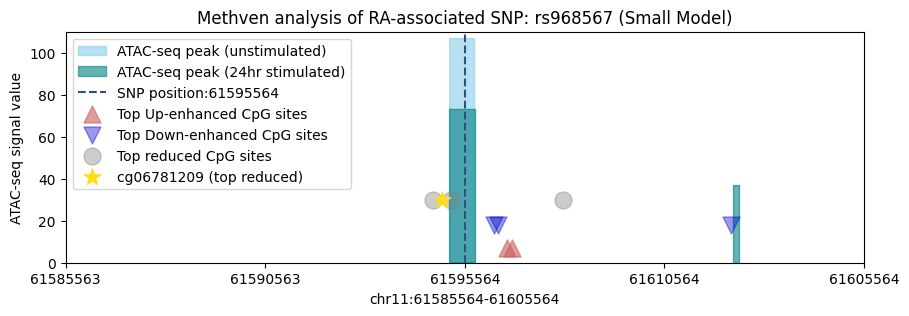

In [3]:
# generate panoramic view: small model
model = 'small'
range = 10_000
atac_0h = np.load(atac_path + rsid + '_' + model + '_h0_atac.npy')
atac_24h = np.load(atac_path + rsid + '_' + model + '_h24_atac.npy')
region_start = snp_position - range - 1
region_end = snp_position + range

positions = np.arange(region_start, region_end, 1)

fig, ax = plt.subplots(figsize=(10.3, 3))
#ax.plot(positions, atac_0h, label='ATAC-seq signal1', color='black')
#ax.plot(positions, atac_24h, label='ATAC-seq signal2', color='black')
ax.fill_between(positions, 0, atac_0h, where=(atac_0h > 0), color='#87CEEB', alpha=0.6, label='ATAC-seq peak (unstimulated)')
ax.fill_between(positions, 0, atac_24h, where=(atac_24h > 0), color='#008080', alpha=0.6, label='ATAC-seq peak (24hr stimulated)')

ax.axvline(x=snp_position, color='#304E7E', linestyle='--', label='SNP position:' + str(snp_position))

cpg_positions_blue = [snp_position+6668, snp_position+743,snp_position+841]
cpg_positions_red = [snp_position+1191, snp_position+1062]
cpg_positions_black = [snp_position-795, snp_position-341, snp_position+2461]
cg06781209 = [snp_position-567]

ax.scatter(cpg_positions_red, [7] * len(cpg_positions_red),
           color='#CD5C5C', marker='^', s=150, label='Top Up-enhanced CpG sites', alpha=0.6)
ax.scatter(cpg_positions_blue, [18] * len(cpg_positions_blue),
           color='#0000CD', marker='v', s=150, label='Top Down-enhanced CpG sites', alpha=0.4)
ax.scatter(cpg_positions_black, [30] * len(cpg_positions_black),
           color='#808080', marker='o', s=150, label='Top reduced CpG sites', alpha=0.4)
ax.scatter(cg06781209, [30] * len(cg06781209),
           color='#FFDE18', marker='*', s=150, label='cg06781209 (top reduced)', alpha=1)

ax.set_xlabel('chr11:' + str(snp_position-range) + '-' + str(snp_position+range))
ax.set_ylabel('ATAC-seq signal value')
plt.ylim(0, 110)
plt.xticks([region_start,region_start+5000,snp_position,region_end-5000,region_end],
            [str(region_start),str(region_start+5000),str(snp_position),str(region_end+5000),str(region_end)])
ax.legend(loc="upper left")
plt.title('Methven analysis of RA-associated SNP: rs968567 (Small Model)')
plt.savefig('images/case/small.png',dpi=300, bbox_inches = 'tight')
plt.show()

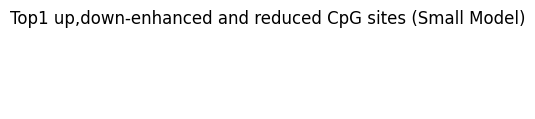

In [3]:
ax = plt.subplots(figsize=(1,1))
plt.axis('off')
plt.title('Top1 up,down-enhanced and reduced CpG sites (Small Model)')
plt.savefig('images/case/head.png',dpi=300, bbox_inches = 'tight')
plt.show()

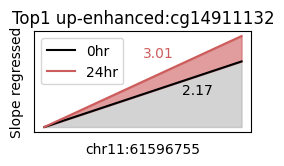

In [4]:
top_red_cpg = 'cg14911132'
top_red_pos = 61596755
top_red_slope1 = 2.17
top_red_slope2 = 3.01
positions = np.array([0,1])
y1 = np.array([0,top_red_slope1])
y2 = np.array([0,top_red_slope2])

fig, ax = plt.subplots(figsize=(2.8, 1.3))

ax.plot(positions, y1, label='0hr', color='#000000')
ax.plot(positions, y2, label='24hr', color='#CD5C5C')
plt.text(0.7,1.1,str(top_red_slope1), fontsize=10, color='#000000')
plt.text(0.5,2.3,str(top_red_slope2), fontsize=10, color='#CD5C5C')
ax.fill_between(positions, 0, y1, color='#A9A9A9', alpha=0.5)
ax.fill_between(positions, y1, y2, color='#CD5C5C', alpha=0.6)
ax.legend(loc="best")
plt.xticks([top_red_pos],[str(top_red_pos)])
plt.yticks([],[])
ax.set_xlabel('chr11:' + str(top_red_pos))
ax.set_ylabel('Slope regressed')
plt.title('Top1 up-enhanced:' + top_red_cpg)
plt.savefig('images/case/topred-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

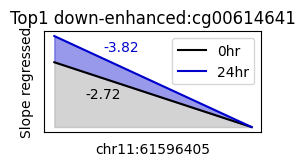

In [5]:
top_blue_cpg = 'cg00614641'
top_blue_pos = 61596405
top_blue_slope1 = -2.72
top_blue_slope2 = -3.82
positions = np.array([0,1])
y1 = np.array([-top_blue_slope1,0])
y2 = np.array([-top_blue_slope2,0])

fig, ax = plt.subplots(figsize=(2.8, 1.3))

ax.plot(positions, y1, label='0hr', color='#000000')
ax.plot(positions, y2, label='24hr', color='#0000CD')
plt.text(0.16,1.2,str(top_blue_slope1), fontsize=10, color='#000000')
plt.text(0.25,3.2,str(top_blue_slope2), fontsize=10, color='#0000CD')
ax.fill_between(positions, 0, y1, color='#A9A9A9', alpha=0.5)
ax.fill_between(positions, y1, y2, color='#0000CD', alpha=0.4)
ax.legend(loc="best")
plt.xticks([top_blue_pos],[str(top_blue_pos)])
plt.yticks([],[])
ax.set_xlabel('chr11:' + str(top_blue_pos))
ax.set_ylabel('Slope regressed')
plt.title('Top1 down-enhanced:' + top_blue_cpg)
plt.savefig('images/case/topblue-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

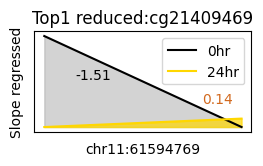

In [6]:
top_black_cpg = 'cg21409469'
top_black_pos = 61594769
top_black_slope1 = -1.51
top_black_slope2 = 0.14
positions = np.array([0,1])
y1 = np.array([-top_black_slope1,0])
y2 = np.array([0,top_black_slope2])

fig, ax = plt.subplots(figsize=(2.8, 1.3))

ax.plot(positions, y1, label='0hr', color='#000000')
ax.plot(positions, y2, label='24hr', color='#FFD700')
plt.text(0.16,0.8,str(top_black_slope1), fontsize=10, color='#000000')
plt.text(0.8,0.4,str(top_black_slope2), fontsize=10, color='#D2691E')
ax.fill_between(positions, 0, y1, color='#A9A9A9', alpha=0.5)
ax.fill_between(positions, 0, y2, color='#FFD700', alpha=0.7)
ax.legend(loc="best")
plt.xticks([top_black_pos],[str(top_black_pos)])
plt.yticks([],[])
ax.set_xlabel('chr11:' + str(top_black_pos))
ax.set_ylabel('Slope regressed')
plt.title('Top1 reduced:' + top_black_cpg)
plt.savefig('images/case/topblack-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

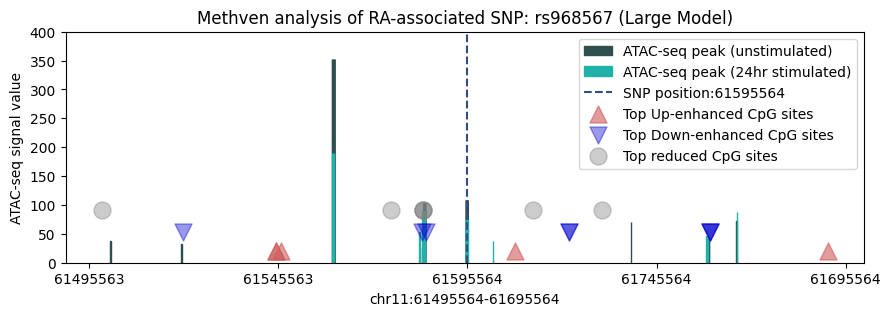

In [4]:
# generate panoramic view: large model
model = 'large'
range = 100_000
atac_0h = np.load(atac_path + rsid + '_' + model + '_h0_atac.npy')
atac_24h = np.load(atac_path + rsid + '_' + model + '_h24_atac.npy')
region_start = snp_position - range - 1
region_end = snp_position + range

positions = np.arange(region_start, region_end, 1)

fig, ax = plt.subplots(figsize=(10.3, 3))
#ax.plot(positions, atac_0h, label='ATAC-seq signal1', color='black')
#ax.plot(positions, atac_24h, label='ATAC-seq signal2', color='black')
ax.fill_between(positions, 0, atac_0h, where=(atac_0h > 0), color='#2F4F4F', alpha=1, label='ATAC-seq peak (unstimulated)')
ax.fill_between(positions, 0, atac_24h, where=(atac_24h > 0), color='#20B2AA', alpha=1, label='ATAC-seq peak (24hr stimulated)')

ax.axvline(x=snp_position, color='#304E7E', linestyle='--', label='SNP position:' + str(snp_position))

cpg_positions_blue = [snp_position+64101, snp_position+64105, snp_position+26753, snp_position+64152, snp_position-10910,snp_position+26757,snp_position-12004,snp_position-75306]
cpg_positions_red = [snp_position-50674, snp_position+12511, snp_position+95252,snp_position-50658,snp_position-49326]
cpg_positions_black = [snp_position-11790, snp_position-11768, snp_position-11801,snp_position-20345,snp_position+17211,snp_position+35700,snp_position-96680]

ax.scatter(cpg_positions_red, [20] * len(cpg_positions_red),
           color='#CD5C5C', marker='^', s=150, label='Top Up-enhanced CpG sites', alpha=0.6)
ax.scatter(cpg_positions_blue, [53] * len(cpg_positions_blue),
           color='#0000CD', marker='v', s=150, label='Top Down-enhanced CpG sites', alpha=0.4)
ax.scatter(cpg_positions_black, [92] * len(cpg_positions_black),
           color='#808080', marker='o', s=150, label='Top reduced CpG sites', alpha=0.4)

ax.set_xlabel('chr11:' + str(snp_position-range) + '-' + str(snp_position+range))
ax.set_ylabel('ATAC-seq signal value')
plt.ylim(0, 400)
plt.xticks([region_start,region_start+50000,snp_position,region_end-50000,region_end],
            [str(region_start),str(region_start+50000),str(snp_position),str(region_end+50000),str(region_end)])
ax.legend(loc="upper right")
plt.title('Methven analysis of RA-associated SNP: rs968567 (Large Model)')
plt.savefig('images/case/large.png',dpi=300, bbox_inches = 'tight')
plt.show()

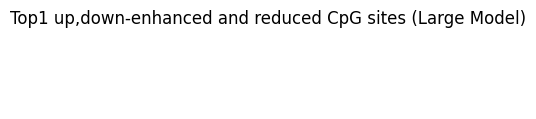

In [8]:
ax = plt.subplots(figsize=(1,1))
plt.axis('off')
plt.title('Top1 up,down-enhanced and reduced CpG sites (Large Model)')
plt.savefig('images/case/head-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

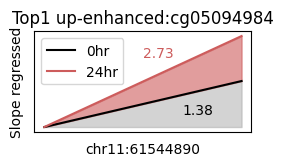

In [9]:
top_red_cpg = 'cg05094984'
top_red_pos = 61544890
top_red_slope1 = 1.38
top_red_slope2 = 2.73
positions = np.array([0,1])
y1 = np.array([0,top_red_slope1])
y2 = np.array([0,top_red_slope2])

fig, ax = plt.subplots(figsize=(2.8, 1.3))

ax.plot(positions, y1, label='0hr', color='#000000')
ax.plot(positions, y2, label='24hr', color='#CD5C5C')
plt.text(0.7,0.4,str(top_red_slope1), fontsize=10, color='#000000')
plt.text(0.5,2.1,str(top_red_slope2), fontsize=10, color='#CD5C5C')
ax.fill_between(positions, 0, y1, color='#A9A9A9', alpha=0.5)
ax.fill_between(positions, y1, y2, color='#CD5C5C', alpha=0.6)
ax.legend(loc="best")
plt.xticks([top_red_pos],[str(top_red_pos)])
plt.yticks([],[])
ax.set_xlabel('chr11:' + str(top_red_pos))
ax.set_ylabel('Slope regressed')
plt.title('Top1 up-enhanced:' + top_red_cpg)
plt.savefig('images/case/topred-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

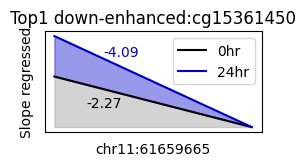

In [10]:
top_blue_cpg = 'cg15361450'
top_blue_pos = 61659665
top_blue_slope1 = -2.27
top_blue_slope2 = -4.09
positions = np.array([0,1])
y1 = np.array([-top_blue_slope1,0])
y2 = np.array([-top_blue_slope2,0])

fig, ax = plt.subplots(figsize=(2.8, 1.3))

ax.plot(positions, y1, label='0hr', color='#000000')
ax.plot(positions, y2, label='24hr', color='#0000CD')
plt.text(0.16,0.9,str(top_blue_slope1), fontsize=10, color='#000000')
plt.text(0.25,3.2,str(top_blue_slope2), fontsize=10, color='#0000CD')
ax.fill_between(positions, 0, y1, color='#A9A9A9', alpha=0.5)
ax.fill_between(positions, y1, y2, color='#0000CD', alpha=0.4)
ax.legend(loc="best")
plt.xticks([top_blue_pos],[str(top_blue_pos)])
plt.yticks([],[])
ax.set_xlabel('chr11:' + str(top_blue_pos))
ax.set_ylabel('Slope regressed')
plt.title('Top1 down-enhanced:' + top_blue_cpg)
plt.savefig('images/case/topblue-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

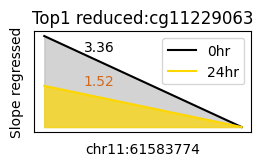

In [11]:
top_black_cpg = 'cg11229063'
top_black_pos = 61583774
top_black_slope1 = 3.36
top_black_slope2 = 1.52
positions = np.array([0,1])
y1 = np.array([top_black_slope1,0])
y2 = np.array([top_black_slope2,0])

fig, ax = plt.subplots(figsize=(2.8, 1.3))

ax.plot(positions, y1, label='0hr', color='#000000')
ax.plot(positions, y2, label='24hr', color='#FFD700')
plt.text(0.2,2.8,str(top_black_slope1), fontsize=10, color='#000000')
plt.text(0.2,1.56,str(top_black_slope2), fontsize=10, color='#D2691E')
ax.fill_between(positions, 0, y1, color='#A9A9A9', alpha=0.5)
ax.fill_between(positions, 0, y2, color='#FFD700', alpha=0.7)
ax.legend(loc="best")
plt.xticks([top_black_pos],[str(top_black_pos)])
plt.yticks([],[])
ax.set_xlabel('chr11:' + str(top_black_pos))
ax.set_ylabel('Slope regressed')
plt.title('Top1 reduced:' + top_black_cpg)
plt.savefig('images/case/topblack-large.png',dpi=300, bbox_inches = 'tight')
plt.show()